Model Training
Training CNN model on ISL dataset and saving best version (.h5, .tflite)

In [1]:
# Imports and Data Load
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load preprocessed arrays
X_train = np.load('../data/processed/X_train.npy')
y_train = np.load('../data/processed/y_train.npy')
X_val = np.load('../data/processed/X_val.npy')
y_val = np.load('../data/processed/y_val.npy')
X_test = np.load('../data/processed/X_test.npy')
y_test = np.load('../data/processed/y_test.npy')

# Load label encoder if available
label_encoder = joblib.load('../logs/label_encoder.pkl') if os.path.exists('../logs/label_encoder.pkl') else None

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [3]:
# Build CNN Model
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_cnn_model((64, 64, 3), y_train.shape[1])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

e:\DataScienceProjects\isl_translator\isl_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         8,995 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282,147 (4.89 MB)

 Trainable params: 1,282,147 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Callbacks
os.makedirs('../models', exist_ok=True)
checkpoint_cb = callbacks.ModelCheckpoint('../models/best_model.h5', save_best_only=True, monitor='val_accuracy')
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
# Train Model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 466s 468ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 1.4759e-09
Epoch 2/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 398s 372ms/step - accuracy: 0.9999 - loss: 2.0798e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 346s 376ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 377s 371ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 3197s 3s/step - accuracy: 0.9999 - loss: 1.0212e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 369s 364ms/step - accuracy: 0.9999 - loss: 5.6417e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 377s 358ms/step - accuracy: 0.9998 - loss: 7.9292e-04 - val_accuracy: 1.0000 - val_loss: 1.8922e-11


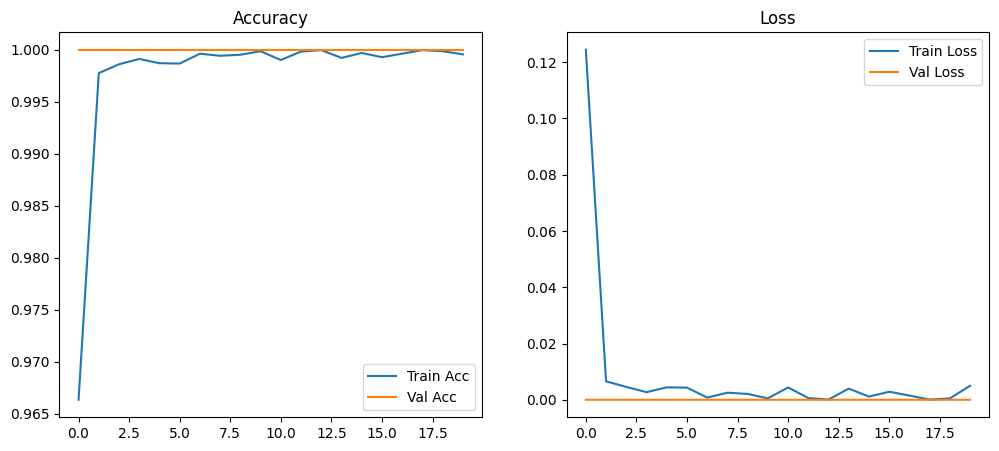

In [6]:
#  Accuracy and Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [7]:
#  Evaluate on Test Data
loss, acc = model.evaluate(X_test, y_test)
print(f" Test Accuracy: {acc:.2%}")

197/197 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 1.0000 - loss: 0.0000e+00
 Test Accuracy: 100.00%


197/197 ━━━━━━━━━━━━━━━━━━━━ 28s 143ms/step


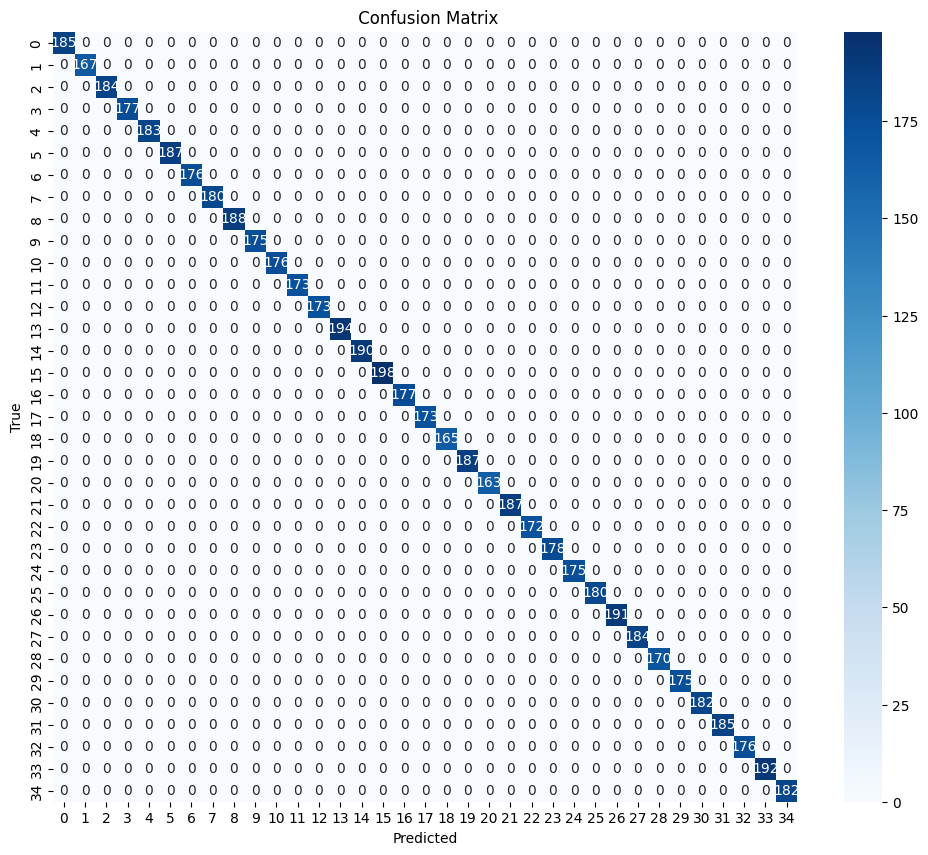

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       184
           3       1.00      1.00      1.00       177
           4       1.00      1.00      1.00       183
           5       1.00      1.00      1.00       187
           6       1.00      1.00      1.00       176
           7       1.00      1.00      1.00       180
           8       1.00      1.00      1.00       188
           9       1.00      1.00      1.00       175
          10       1.00      1.00      1.00       176
          11       1.00      1.00      1.00       173
          12       1.00      1.00      1.00       173
          13       1.00      1.00      1.00       194
          14       1.00      1.00      1.00       190
          15       1.00      1.00      1.00       198
          16       1.00      1.00      1.00       177
          17       1.00    

In [9]:
#  Confusion Matrix + Classification Report
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

if label_encoder is None:
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(np.argmax(y_train, axis=1))
    joblib.dump(label_encoder, '../logs/label_encoder.pkl')

#labels = label_encoder.classes_ if hasattr(label_encoder, 'classes_') else [str(i) for i in range(y_test.shape[1])]
labels = [str(label) for label in (label_encoder.classes_ if hasattr(label_encoder, 'classes_') else range(y_test.shape[1]))]
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title(" Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=labels))

In [10]:
# Export to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("../models/model.tflite", "wb") as f:
    f.write(tflite_model)
print("TFLite model saved.")

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpc6eirtm8\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpc6eirtm8\assets


Saved artifact at 'C:\Users\hp\AppData\Local\Temp\tmpc6eirtm8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 35), dtype=tf.float32, name=None)
Captures:
  1343660042800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737071728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737072784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737071024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737073840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737069440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737072432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737074016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737071552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345737076304: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite mode

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         8,995 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,846,443 (14.67 MB)

 Trainable params: 1,282,147 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,564,296 (9.78 MB)